<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Indicadores_Macro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#Obtendo as bibliotecas.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import pandas_datareader as wb

! pip install pandas_datareader #Baixar dados de ativos financeiros --> API KEY: YGR9cxTVqxTZLyUTGMcC
! pip install quandl            #Baixar dados macroeconomicos.

In [0]:
#Utilizxando a biblioteca Quadl
quandl.ApiConfig.api_key = "YGR9cxTVqxTZLyUTGMcC"

In [0]:
#Outra forma de utilizar a biblioteca sem mostrar a minha senha ca celula.
#Salvar a senha em um arquivo .txt no repositório.


#f = open("senha.txt", "r")
#token = f.read()

#Petróleo

In [0]:
#Petróleo WTI

wti_crude = quandl.get("EIA/PET_RWTC_D", star_date = "2000-01-01")

In [91]:
type(wti_crude)

pandas.core.frame.DataFrame

In [92]:
wti_crude.head()

,Petroleo
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [93]:
wti_crude.rename(columns={"Value":"Petroleo"}, inplace =True)
wti_crude.head()

,Petroleo
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


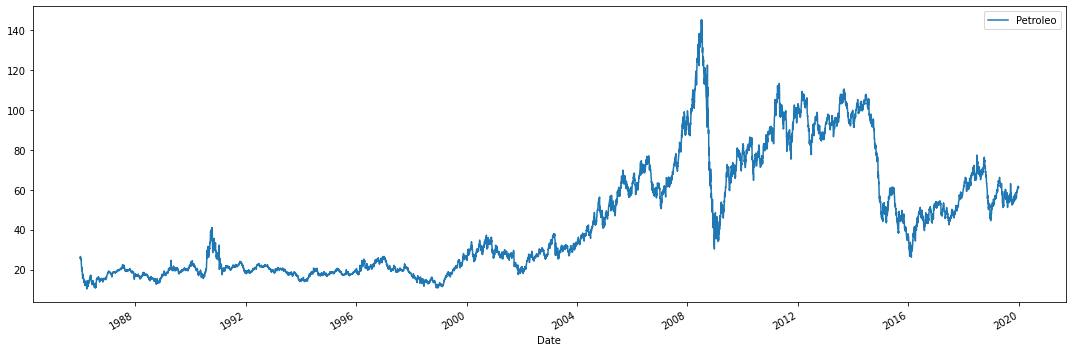

In [94]:
wti_crude.plot(figsize=(15,5))
plt.tight_layout();

#PIB dos EUA

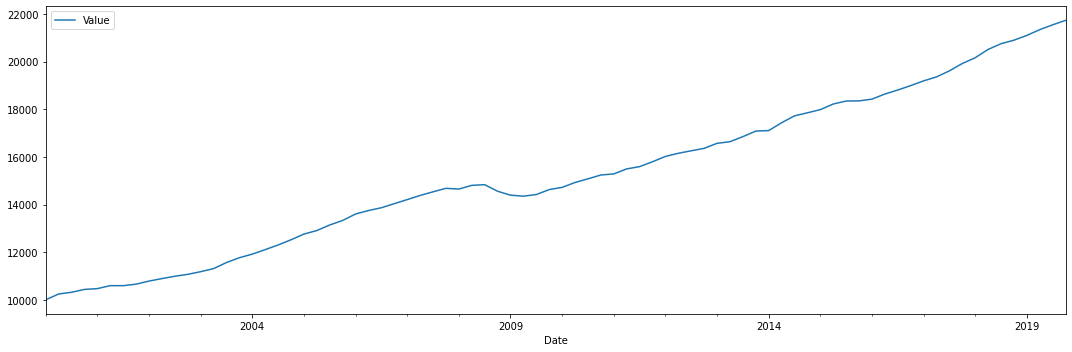

In [95]:
PIB_US = quandl.get("FRED/GDP", start_date = "2000-01-01")
PIB_US.plot(figsize=(15,5))
plt.tight_layout();

#Taxa Selic

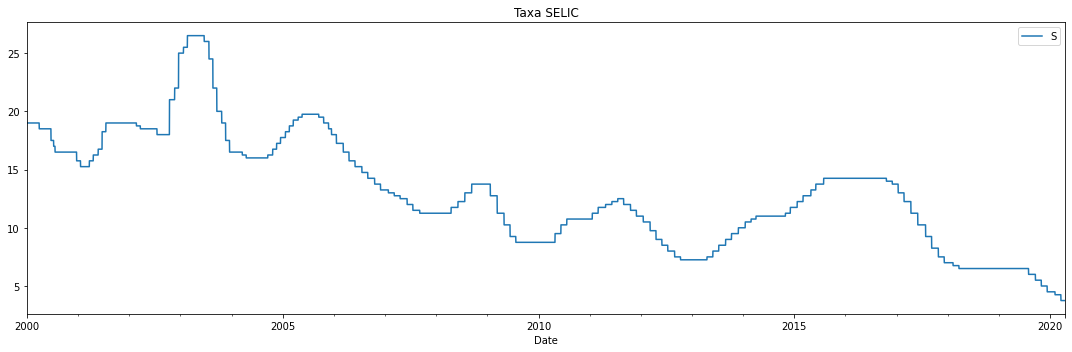

In [111]:
selic = quandl.get("BCB/432", start_date = "2000-01-01")
selic.plot(figsize=(15,5))
plt.title("Taxa SELIC")
plt.legend("SELIC")
plt.tight_layout();

#IPCA

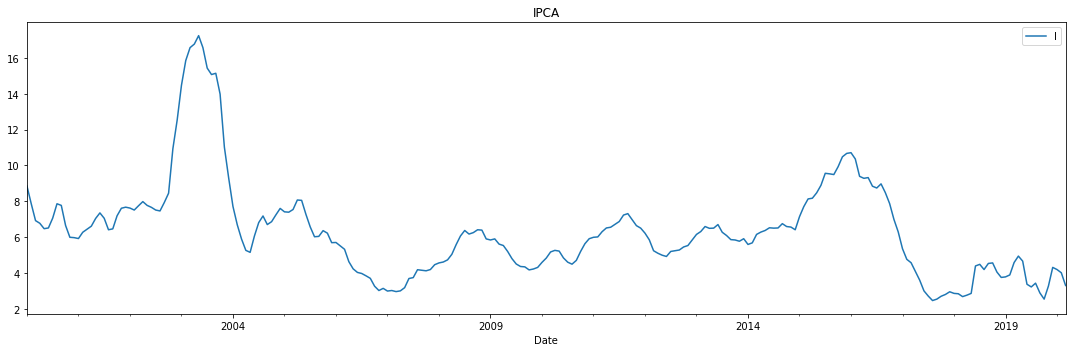

In [113]:
selic = quandl.get("BCB/13522", start_date = "2000-01-01")
selic.plot(figsize=(15,5))
plt.title("IPCA")
plt.legend("IPCA")
plt.tight_layout();

#PIB Brasil

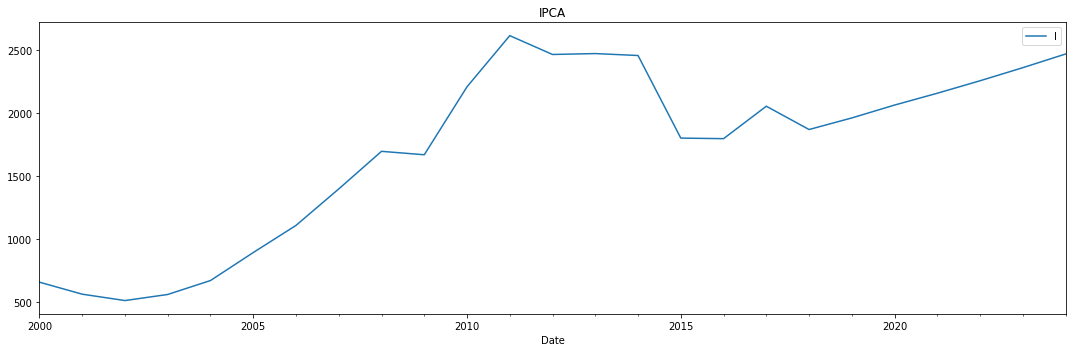

In [114]:
selic = quandl.get("ODA/BRA_NGDPD", start_date = "2000-01-01")
selic.plot(figsize=(15,5))
plt.title("IPCA")
plt.legend("IPCA")
plt.tight_layout();